In [ ]:
!pip install -Uqq fastbook

import fastbook

fastbook.setup_book()

OSError: ignored

In [ ]:
#!pip install fastai1
!pip install fastai 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.data.all import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%mkdir training_data
%cd training_data


mkdir: cannot create directory ‘training_data’: File exists
/content/training_data/training_data


In [ ]:
#Import the libraries for google drive data extraction
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/PlansSections.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/training_data') #Extracts the files into the folder
zip_ref.close()

In [ ]:
 #importing os module for renaming files for the required standard
import os

def rename(folder_name, staring_letter_for_rename):
  for count, filename in enumerate(os.listdir(folder_name)):
    #print(filename)
    src = folder_name + "/" + filename
    dest = folder_name + "/" + staring_letter_for_rename + str(count) + ".jpg"
    os.rename(src, dest)


In [ ]:
#renaming all floorplans from a random name to p1.jpg, p2.jpg,...
rename("/content/training_data/PlansSections/Plans", "p")

In [ ]:
#renaming all sections from a random name to s1.jpg, s2.jpg,...
rename("/content/training_data/PlansSections/Sections", "s")

In [ ]:
#placing all files under ./PlansSections/Plans and ./PlansSections/Sections into a single folder under the path ./PlansAndSections
%cd /content/training_data
%mkdir PlainsAndSections
%cp -a /content/training_data/PlansSections/Plans/. /content/training_data/PlainsAndSections
%cp -a /content/training_data/PlansSections/Sections/. /content/training_data/PlainsAndSections

/content/training_data
mkdir: cannot create directory ‘PlainsAndSections’: File exists


In [ ]:
# label function: if a filename starts with "p" then the image corresponds to a `plain` otherwise to a `section`
def label_func(fname):
    return "floor_plan" if fname.name[0] == "p" else "section"

In [ ]:
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock), 
           get_items = get_image_files,
           get_y=label_func,
           splitter  = RandomSplitter(),
           item_tfms = Resize(224),
           batch_tfms=aug_transforms())

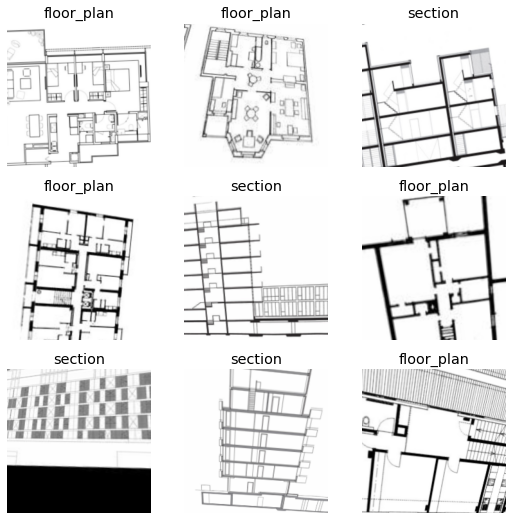

In [ ]:
# Create a DataLoaders object
# Show a sample batch
dls = dblock.dataloaders("/content/training_data/PlainsAndSections")
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy])

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.673335,0.250777,0.906977,04:06


epoch,train_loss,valid_loss,accuracy,time
0,0.265574,0.693909,0.767442,05:05


In [ ]:
#learn.fine_tune(10, 1e-2, freeze_epochs=100)

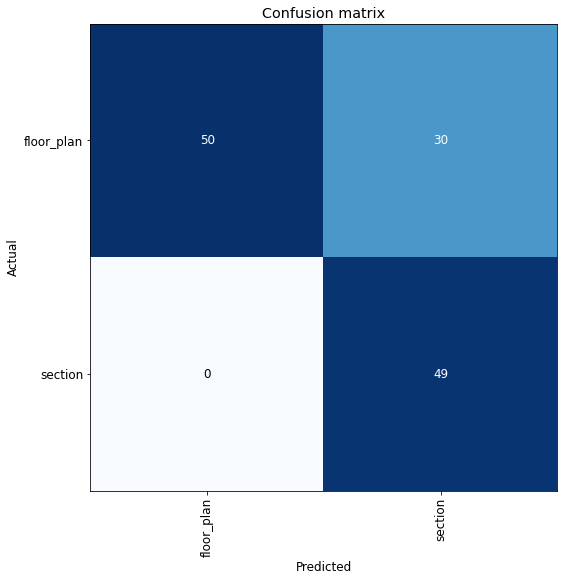

In [ ]:
# Display Confusion Matrix: Actual lables vs Predicted
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))

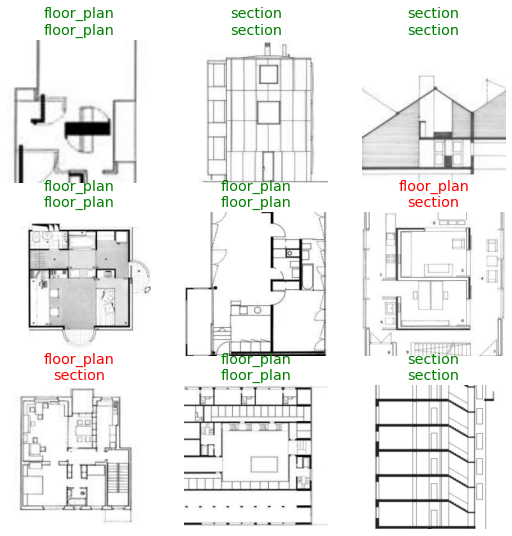

In [ ]:
# Show some images (9 by default) with Target/Prediction as a title
# Labels: Grand truth vs prediction
# When the 2 labels are green, it means the model get its prediction right
learn.show_results()

## Inference (Prediction)

In [ ]:
# Grab an image from the validation dataset
img = dls.valid.items[0]
img

Path('/content/training_data/PlainsAndSections/p152.jpg')

<Axes: >

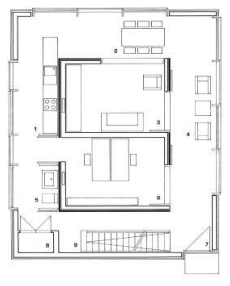

In [ ]:
# Show image
show_image(PILBase.create(img))

In [ ]:
# Predict
learn.predict(img)

('section', TensorBase(1), TensorBase([0.1860, 0.8140]))